In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train_data_path = '../data/raw/train.csv'

# Load the data
train_df = pd.read_csv(train_data_path, header=None, names=['sentiment', 'title', 'review'])

# Display the first few rows
train_df.head()

,sentiment,title,review
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [3]:
train_df.shape

(3600000, 3)

In [4]:
# Get information about data types and memory usage
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   sentiment  int64 
 1   title      object
 2   review     object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [5]:
train_df.isnull().sum()

sentiment      0
title        207
review         0
dtype: int64

In [6]:
train_df['sentiment'].value_counts()

sentiment
2    1800000
1    1800000
Name: count, dtype: int64

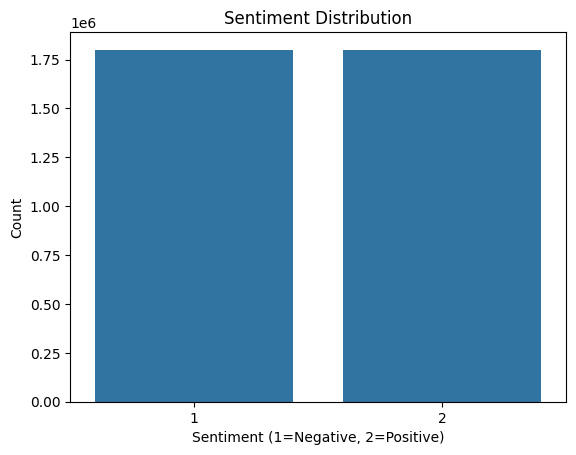

In [7]:
sns.countplot(x='sentiment', data=train_df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (1=Negative, 2=Positive)')
plt.ylabel('Count')
plt.show()

#### Sentiment Distribution
- **Overview**: The dataset consists of 1,800,000 positive and 1,800,000 negative reviews, as shown in the bar plot. The sentiment distribution is perfectly balanced between the two classes: 1 (Negative) and 2 (Positive).
- **Significance**: This balance between positive and negative reviews ensures that the model will not be biased toward any particular class during training. Balanced datasets are advantageous when training models, as they help avoid class imbalance issues, such as overfitting to the majority class.

In [8]:
# Display sample positive reviews
print("Positive Reviews:")
train_df[train_df['sentiment'] == 2].head()

Positive Reviews:


,sentiment,title,review
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [9]:
# Display sample negative reviews
print("Negative Reviews:")
train_df[train_df['sentiment'] == 1].head()

Negative Reviews:


,sentiment,title,review
6,1,Buyer beware,"This is a self-published book, and if you want..."
10,1,The Worst!,A complete waste of time. Typographical errors...
13,1,Oh please,I guess you have to be a romance novel lover f...
14,1,Awful beyond belief!,I feel I have to write to keep others from was...
15,1,Don't try to fool us with fake reviews.,It's glaringly obvious that all of the glowing...


In [10]:
# Add a column for review length
train_df['review_length'] = train_df['review'].apply(len)

# Describe the review lengths
train_df['review_length'].describe()

count    3.600000e+06
mean     4.051396e+02
std      2.342711e+02
min      4.000000e+00
25%      2.070000e+02
50%      3.560000e+02
75%      5.660000e+02
max      1.010000e+03
Name: review_length, dtype: float64

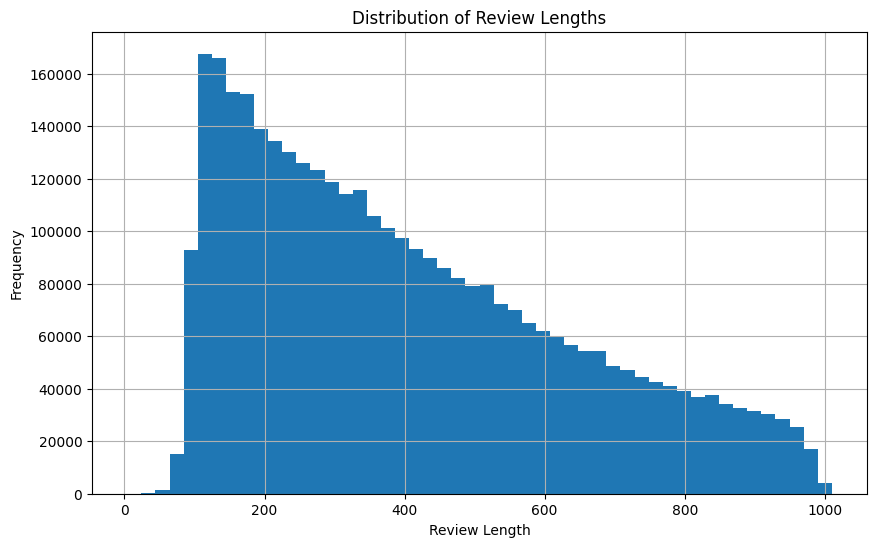

In [11]:
# Plot the distribution of review lengths
plt.figure(figsize=(10,6))
train_df['review_length'].hist(bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

#### Distribution of Review Lengths
- **Overview:** The histogram shows the distribution of review lengths in terms of the number of characters. Most reviews are relatively short, with a large number of reviews falling between 50 and 400 characters. However, the distribution is long-tailed, indicating some very long reviews reaching up to 1000 characters.

- **Key Statistics:**
    - Mean: 405 characters.
    - Standard Deviation: 234 characters.
    - Minimum Length: 4 characters.
    - Maximum Length: 1010 characters.
    - 50th Percentile (Median): 356 characters.
- **Significance**: This information is critical for deciding on feature engineering techniques like tokenization and padding (for models like LSTMs). Shorter reviews dominate the dataset, but the presence of long reviews requires careful handling, such as truncating or padding sequences to maintain consistent input length.

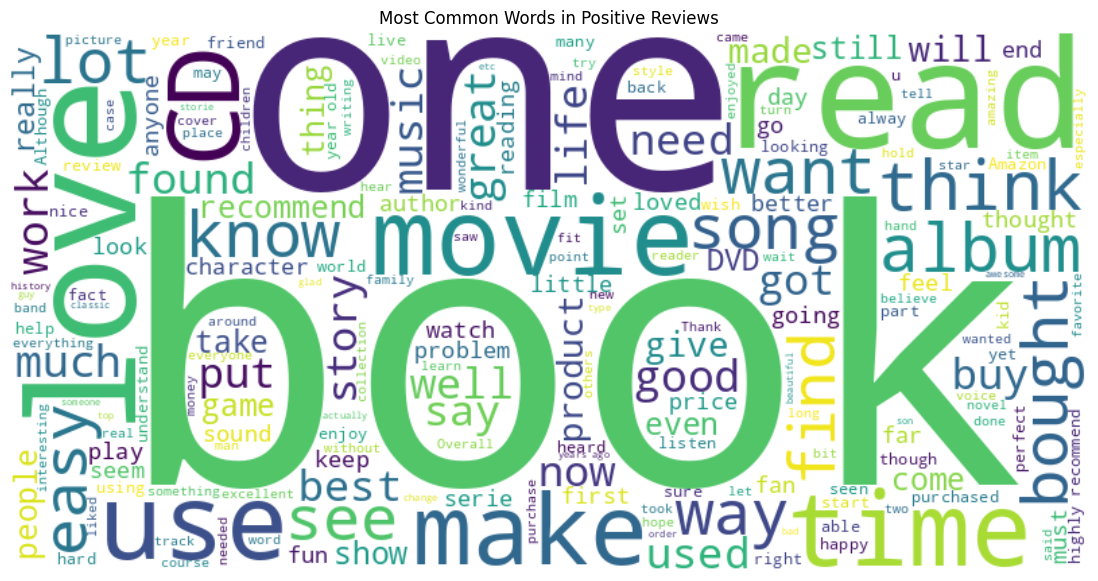

In [12]:
from wordcloud import WordCloud, STOPWORDS

# Combine all positive reviews into one string
positive_reviews = ' '.join(train_df[train_df['sentiment'] == 2]['review'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(positive_reviews)

# Display the word cloud
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Reviews')
plt.show()

- **Key Observations:**
    - Frequent Words: "book," "love," "use," "good," "recommend," "movie," "easy," "great."
    - Common Topics: Many positive reviews seem to focus on books, music, and general products, with reviewers often recommending or praising their ease of use and quality.

- **Significance:** Positive reviews often focus on positive experiences with products, as indicated by words like "love," "great," "recommend," and "easy." Understanding the common words helps in refining preprocessing steps, such as removing common stop words that may not contribute to sentiment analysis.

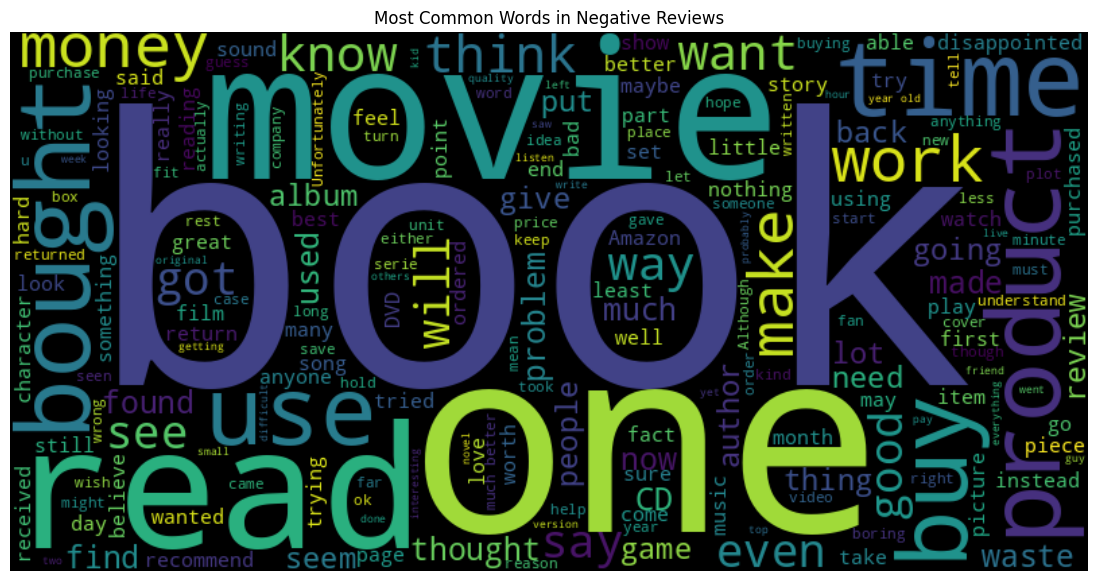

In [13]:
# Combine all negative reviews into one string
negative_reviews = ' '.join(train_df[train_df['sentiment'] == 1]['review'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=STOPWORDS).generate(negative_reviews)

# Display the word cloud
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Reviews')
plt.show()

- **Key Observations:**
    - Frequent Words: "book," "movie," "read," "work," "problem," "money," "return."
    - Common Topics: Negative reviews seem to focus on disappointment with books, movies, and products that do not work as expected or are seen as a waste of money.

- **Significance:** The most frequent words in negative reviews show frustration with quality, performance, and return policies. Words like "problem," "money," "return," and "disappointed" can help inform the sentiment model, as they are indicative of negative experiences.

#### Key Dataset Insights

- Size: The dataset contains 3.6 million entries, with an equal distribution of 1.8 million positive and 1.8 million negative reviews.
- Text Length: Reviews vary significantly in length, with a mean review length of 405 characters. The standard deviation of 234 characters indicates high variability in review length.
- Missing Data: The title column has a small number of missing values (207), but the sentiment and review columns are complete, meaning that data cleaning can focus on the title field.